## Импортируем нужные библиотеки

In [410]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split

## Создаем и визуализируем данные

In [461]:
num=40
X = np.random.randn(num,1)
Y = 2 + X + 2*X**2 + np.random.randn(num,1)

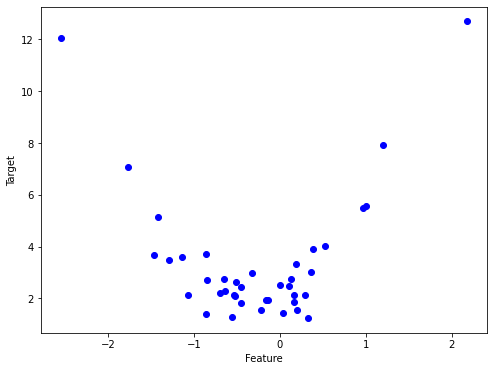

In [462]:
fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, 'ob')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Обучаем алгоритм линейной регрессии

In [413]:
# Метод нормального уравнения
lr = LinearRegression()
lr.fit(X,Y)
ypred = lr.predict(X)

In [414]:
lr.intercept_, lr.coef_

(array([2.85997077]), array([[-0.72898643]]))

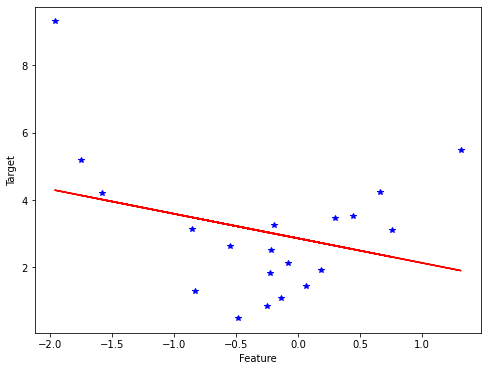

In [415]:
fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, '*b')
plt.plot(X, ypred, '-r')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [416]:
# Метод градиентного спуска
sgd = SGDRegressor(verbose=1)
sgd.fit(X,Y)
ypred = sgd.predict(X)

-- Epoch 1
Norm: 0.12, NNZs: 1, Bias: 0.338023, T: 20, Avg. loss: 6.077687
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.20, NNZs: 1, Bias: 0.558527, T: 40, Avg. loss: 5.220899
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 1, Bias: 0.735745, T: 60, Avg. loss: 4.643305
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.33, NNZs: 1, Bias: 0.885867, T: 80, Avg. loss: 4.206851
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.38, NNZs: 1, Bias: 1.016873, T: 100, Avg. loss: 3.863087
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.43, NNZs: 1, Bias: 1.132756, T: 120, Avg. loss: 3.584212
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.47, NNZs: 1, Bias: 1.236450, T: 140, Avg. loss: 3.353863
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.50, NNZs: 1, Bias: 1.330695, T: 160, Avg. loss: 3.160001
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.53, NNZs: 1, Bias: 1.416799, T: 180, Avg. loss: 2.995122
Total training time: 0.00 seconds.
-- Ep

/Users/ikruglov/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


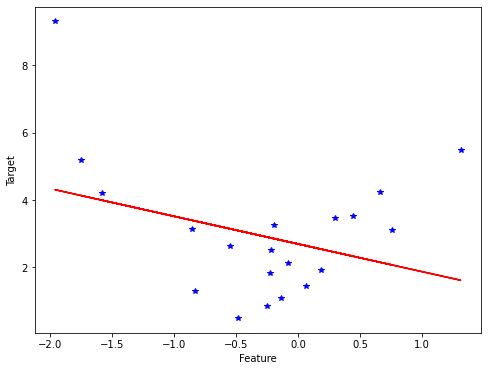

In [417]:
fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, '*b')
plt.plot(X, ypred, '-r')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Создадим полиномиальные признаки и проведен нормировку данных

In [418]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [463]:
#создание полиномиальных признаков
pf = PolynomialFeatures(degree=300)
Xpoly = pf.fit_transform(X)

Xtest = np.linspace(min(X),max(X),1000).reshape(1000,1)
Xtest_poly = pf.transform(Xtest)

In [464]:
X.shape, Xpoly.shape

((40, 1), (40, 301))

In [465]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xpoly)
X_test_scaled = scaler.transform(Xtest_poly)

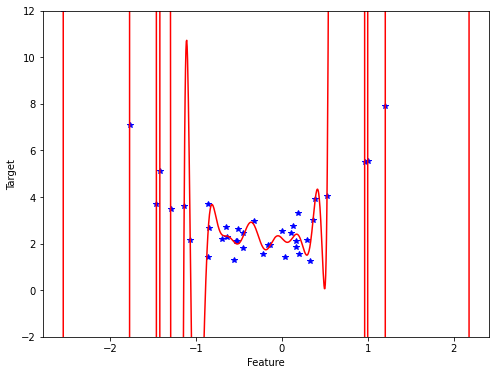

In [468]:
lr = LinearRegression()
lr.fit(X_scaled,Y)
ypred = lr.predict(X_test_scaled)
ytrain_pred = lr.predict(X_scaled)

fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, '*b')
plt.plot(Xtest, ypred, '-r')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.ylim(-2,12)
plt.show()

In [423]:
lr.coef_

array([[ 0.00000000e+00,  2.80857624e-01,  4.35904945e+00,
         3.65584854e+01,  2.13613944e+01, -2.52418497e+02,
        -3.56067663e+02,  2.45042310e+02,  6.46875544e+02,
         2.85150402e+02]])

## Обучение моделей с регуляризацией

In [469]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [478]:
ridge = Ridge(alpha=1)

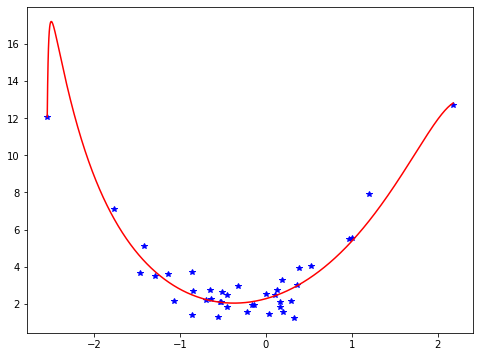

In [479]:
ridge.fit(X_scaled,Y)
ypred = ridge.predict(X_test_scaled)
ytrain_pred = ridge.predict(X_scaled)

fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, '*b')
plt.plot(Xtest, ypred, '-r')
#plt.plot(Xtest, ypred, '-r')
plt.show()

In [431]:
ridge.coef_

array([[ 0.        ,  1.12206457,  1.51592063, -0.45591435, -0.41901748,
         0.17259466, -0.18745298, -0.1506588 ,  0.43881829, -0.78450363]])

In [435]:
ridgecv = RidgeCV(alphas=np.linspace(1e-2,1,100))

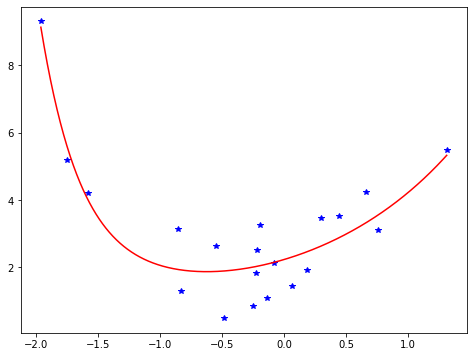

In [436]:
ridgecv.fit(X_scaled,Y)
ypred = ridgecv.predict(X_test_scaled)
ytrain_pred = ridgecv.predict(X_scaled)

fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, '*b')
plt.plot(Xtest, ypred, '-r')
#plt.plot(Xtest, ypred, '-r')
plt.show()

In [437]:
ridgecv.alpha_

1.0

In [438]:
ridgecv.coef_

array([[ 0.        ,  0.89186229,  0.8789838 ,  0.00959729,  0.32707516,
        -0.08886417,  0.25611977, -0.1875218 ,  0.29422018, -0.28754956]])

In [480]:
lassocv = LassoCV(alphas=np.linspace(1e-4,1,100))

/Users/ikruglov/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ikruglov/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.710e+00, tolerance: 5.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/ikruglov/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.094e+00, tolerance: 2.502e-02
  model = cd

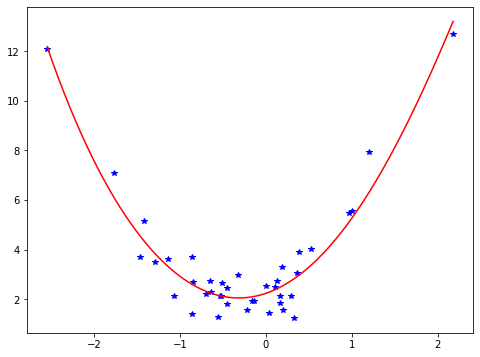

In [481]:
lassocv.fit(X_scaled,Y)
ypred = lassocv.predict(X_test_scaled)
ytrain_pred = lassocv.predict(X_scaled)

fig = plt.figure(figsize=(8,6))
plt.plot(X, Y, '*b')
plt.plot(Xtest, ypred, '-r')
#plt.plot(Xtest, ypred, '-r')
plt.show()

In [482]:
lassocv.alpha_

0.0304

In [483]:
lassocv.intercept_, lassocv.coef_

(3.426128115737778,
 array([ 0.        ,  1.00633584,  2.44799123, -0.        , -0.        ,
        -0.15920008, -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.       

## Домашнее задание

Обучить полиномиальную регрессию, построить зависимость предсказанного от реального значения и рассчитать ошибку (всё для обучающей и тестовой выборок) для датасета сталей и предсказать предел текучести (0.2% Proof Stress (MPa)) на основании состава и температуры. Для большого числа признаков использовать регуляризацию. Постараться достичь минимально возможной ошибки на тестовой выборке. 

По желанию можно использовать кросс-валидацию для расчет метрики ошибки и поиск по сетке для подбора параметров регуляризации. Также можно самим реализовать алгоритм градиентного спуска и с его помощью рассчитать ошибку.